In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
def VWAP(DF):
    df=DF.copy()
    df["typ"]=(df["High"]+df["Low"]+df["Close"])/3
    df["typ_vol"]=df["typ"]*df["Volume"]
    df["cum_typ_vol"]=df["typ_vol"].cumsum()
    df["cum_vol"]=df["Volume"].cumsum()
    df["vwap"]=df["cum_typ_vol"]/df["cum_vol"]
    return df["vwap"]

In [3]:
ticker='spy'

In [4]:
stock_intraday=pd.read_csv("SPY_intraday.csv")
stock_intraday["Datetime"]=pd.to_datetime(stock_intraday["Datetime"])
stock_intraday["Adj Close"]=stock_intraday["Close"]
#might drop "Close"
stock_intraday.index=stock_intraday["Datetime"]
#might drop "Datetime"
stock_intraday

,Datetime,Open,High,Low,Close,Volume,hours,Adj Close
Datetime,,,,,,,,
2005-01-03 09:30:00,2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday,87.1111
2005-01-03 09:35:00,2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday,87.1827
2005-01-03 09:40:00,2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday,87.1326
2005-01-03 09:45:00,2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday,87.0968
2005-01-03 09:50:00,2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday,87.0180
...,...,...,...,...,...,...,...,...
2022-11-25 15:30:00,2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday,402.3600
2022-11-25 15:35:00,2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday,402.4800
2022-11-25 15:40:00,2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday,402.3900


In [5]:
#stock_intraday=yf.download(ticker,period='60d',interval='5m')
#stock_intraday

In [6]:
import yfinance as yf
stock_daily=yf.download(ticker,period='max',interval='1d')
stock_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397583,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451395,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720432,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828037,531500
...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900


In [7]:
stock_daily.index[0]

Timestamp('1993-01-29 00:00:00')

In [8]:
stock_weekly=yf.download(ticker,period="max",interval='1wk')
stock_weekly

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810127,2234800.0
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.002995,998700.0
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0
...,...,...,...,...,...,...
2022-11-21,394.640015,402.929993,392.660004,402.329987,400.490936,210479200.0
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0


In [9]:
stock_monthly=yf.download(ticker,period="max",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [10]:
def pivot_daily(df):
    """
    input=1d dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [11]:
def pivot_weekly(df):
    """
    input=1 week dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [12]:
def pivot_monthly(df):
    """
    input=1 month dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [13]:
# call the pivot in daily timeframe daily

In [14]:
stock_daily["week"]=stock_daily.index.week

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_26684/2912323420.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_daily["week"]=stock_daily.index.week


In [15]:
stock_daily["month"]=stock_daily.index.month

In [16]:
stock_daily["year"]=stock_daily.index.year

In [17]:
stock_daily

,Open,High,Low,Close,Adj Close,Volume,week,month,year
Date,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200,4,1,1993
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397583,480500,5,2,1993
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451395,201300,5,2,1993
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720432,529400,5,2,1993
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828037,531500,5,2,1993
...,...,...,...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500,50,12,2022
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300,50,12,2022
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900,50,12,2022


In [18]:
stock_weekly["week"]=stock_weekly.index.week
stock_weekly["year"]=stock_weekly.index.year

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_26684/37262271.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_weekly["week"]=stock_weekly.index.week


In [19]:
stock_weekly

,Open,High,Low,Close,Adj Close,Volume,week,year
Date,,,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0,4,1993
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810127,2234800.0,5,1993
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0,6,1993
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.002995,998700.0,7,1993
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0,8,1993
...,...,...,...,...,...,...,...,...
2022-11-21,394.640015,402.929993,392.660004,402.329987,400.490936,210479200.0,47,2022
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0,48,2022
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0,49,2022


In [20]:
stock_monthly["month"]=stock_monthly.index.month
stock_monthly["year"]=stock_monthly.index.year

In [21]:
stock_monthly

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.487263,5.417600e+06,2,1993
1993-03-01,44.562500,45.843750,44.218750,45.187500,25.935678,3.019200e+06,3,1993
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN,3,1993
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.391399,2.697200e+06,4,1993
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.076181,1.808000e+06,5,1993
...,...,...,...,...,...,...,...,...
2022-10-01,361.079987,389.519989,348.109985,386.209991,384.444611,2.024732e+09,10,2022
2022-11-01,390.140015,407.679993,368.790009,407.679993,405.816467,1.745985e+09,11,2022
2022-12-01,408.769989,410.489990,381.040009,383.269989,381.518066,1.069737e+09,12,2022


In [22]:
len(stock_daily)

7528

In [23]:
pivot_daily

<function __main__.pivot_daily(df)>

In [24]:
daily_pivot=pivot_daily(stock_daily)
weekly_pivot=pivot_weekly(stock_weekly)
monthly_pivot=pivot_monthly(stock_monthly)

In [25]:
daily_pivot

,Open,High,Low,Close,Adj Close,Volume,week,month,year,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200,4,1,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397583,480500,5,2,1993,43.89,43.86,43.92,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451395,201300,5,2,1993,44.16,44.11,44.21,44.35,44.07,44.44,43.88,44.63,43.79
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720432,529400,5,2,1993,44.28,44.25,44.31,44.44,44.18,44.53,44.03,44.68,43.94
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828037,531500,5,2,1993,44.68,44.61,44.75,44.98,44.52,45.15,44.21,45.45,44.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500,50,12,2022,397.10,396.18,398.02,400.79,395.25,402.64,391.56,406.33,389.71
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300,50,12,2022,403.84,404.78,402.90,408.61,397.19,415.26,392.42,420.03,385.77
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900,50,12,2022,400.40,400.90,399.90,404.49,395.30,409.59,391.21,413.68,386.11


In [26]:
weekly_pivot

,Open,High,Low,Close,Adj Close,Volume,week,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0,4,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810127,2234800.0,5,1993,43.89,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0,6,1993,44.68,45.39,44.27,45.80,43.56,46.52,43.14
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.002995,998700.0,7,1993,44.75,44.97,44.38,45.34,44.16,45.56,43.78
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0,8,1993,43.61,44.41,42.75,45.27,41.95,46.06,41.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,394.640015,402.929993,392.660004,402.329987,400.490936,210479200.0,47,2022,396.16,402.18,390.01,408.33,383.99,414.35,377.84
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0,48,2022,399.31,405.96,395.69,409.58,389.04,416.23,385.42
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0,49,2022,403.40,413.50,396.80,420.10,386.70,430.20,380.10


In [27]:
weekly_pivot=weekly_pivot[:-1]

In [28]:
monthly_pivot

,Open,High,Low,Close,Adj Close,Volume,month,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.487263,5.417600e+06,2,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-01,44.562500,45.843750,44.218750,45.187500,25.935678,3.019200e+06,3,1993,44.11,45.41,43.10,46.42,41.80,47.72,40.78
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN,3,1993,45.08,45.94,44.32,46.70,43.46,47.57,42.69
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.391399,2.697200e+06,4,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.076181,1.808000e+06,5,1993,44.19,45.10,43.13,46.16,42.22,47.07,41.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,361.079987,389.519989,348.109985,386.209991,384.444611,2.024732e+09,10,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,390.140015,407.679993,368.790009,407.679993,405.816467,1.745985e+09,11,2022,374.61,401.11,359.70,416.02,333.20,442.52,318.29
2022-12-01,408.769989,410.489990,381.040009,383.269989,381.518066,1.069737e+09,12,2022,394.72,420.65,381.76,433.61,355.83,459.54,342.87


In [29]:
monthly_pivot=monthly_pivot[:-1]

In [30]:
import datetime as dt
today=dt.datetime(2022,11,25)
print(today)
print(today.year)
print(today.month)
print(today.day)
print(today.isocalendar().week)    #getting the week of the year

2022-11-25 00:00:00
2022
11
25
47


In [31]:
weekly_pivot["week"]==today.isocalendar().week

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-11-14    False
2022-11-21     True
2022-11-28    False
2022-12-05    False
2022-12-12    False
Name: week, Length: 1679, dtype: bool

In [32]:
weekly_pivot["year"]==today.year

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-11-14     True
2022-11-21     True
2022-11-28     True
2022-12-05     True
2022-12-12     True
Name: year, Length: 1679, dtype: bool

In [51]:
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==today.isocalendar().week and weekly_pivot["year"][i]==today.year:
        week_index=i

In [52]:
weekly_pivot.iloc[week_index]

Open         3.946400e+02
High         4.029300e+02
Low          3.926600e+02
Close        4.023300e+02
Adj Close    4.004909e+02
Volume       2.104792e+08
week         4.700000e+01
year         2.022000e+03
PP           3.961600e+02
R1           4.021800e+02
S1           3.900100e+02
R2           4.083300e+02
S2           3.839900e+02
R3           4.143500e+02
S3           3.778400e+02
Name: 2022-11-21 00:00:00, dtype: float64

In [53]:
weekly_pivot.iloc[week_index:]["R1"][0]


402.18

In [54]:
weekly_pivot.iloc[week_index:]["S1"][0]


390.01

In [55]:
weekly_pivot.iloc[week_index:]["PP"][0]


396.16

In [56]:
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==today.month and monthly_pivot["year"][j]==today.year:
        month_index=j
        

In [57]:
monthly_pivot.iloc[month_index]

Open         3.901400e+02
High         4.076800e+02
Low          3.687900e+02
Close        4.076800e+02
Adj Close    4.058165e+02
Volume       1.745985e+09
month        1.100000e+01
year         2.022000e+03
PP           3.746100e+02
R1           4.011100e+02
S1           3.597000e+02
R2           4.160200e+02
S2           3.332000e+02
R3           4.425200e+02
S3           3.182900e+02
Name: 2022-11-01 00:00:00, dtype: float64

In [58]:
monthly_pivot.iloc[month_index:]['PP'][0]

374.61

In [59]:
monthly_pivot.iloc[month_index:]["S1"][0]

359.7

In [60]:
monthly_pivot.iloc[month_index:]["R1"][0]

401.11

In [61]:
date='2022-11-25'
daily_pivot.loc[date]["Low"]

401.5400085449219

In [62]:
daily_pivot.loc[date]["PP"]

401.55

In [63]:
daily_pivot.loc[date]["TC"]

401.98

In [64]:
daily_pivot.loc[date]["BC"]

401.12

In [65]:
daily_pivot.loc[date]["S1"]

400.17

In [66]:
daily_pivot.loc[date]["R1"]

403.79

In [67]:
daily_pivot.shift(1).loc[date]["High"]

402.92999267578125

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_26684/3004619412.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_intraday[date]["Adj Close"].plot()


Text(0.5, 1.0, '2022-11-25')

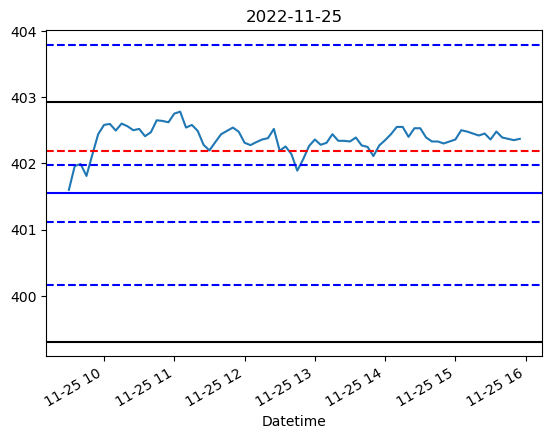

In [73]:
import datetime as dt

date1=dt.datetime(2022,11,25)
date='2022-11-25'

stock_intraday[date]["Adj Close"].plot()
#plot daily pivots
plt.axhline(y=daily_pivot.loc[date]["PP"],color='b',linestyle='-')
plt.axhline(y=daily_pivot.loc[date]["TC"],color='b',linestyle='--')
plt.axhline(y=daily_pivot.loc[date]["BC"],color='b',linestyle='--')

plt.axhline(y=daily_pivot.loc[date]["R1"],color='b',linestyle='--')
plt.axhline(y=daily_pivot.loc[date]["S1"],color='b',linestyle='--')

i=0
j=0
#plot weekly pivots
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==date1.isocalendar().week and weekly_pivot["year"][i]==date1.year:
        index_week=i
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=weekly_pivot.iloc[index_week:]["PP"][0],color='r',linestyle='-')
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=weekly_pivot.iloc[index_week:]["R1"][0],color='r',linestyle='--')
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=weekly_pivot.iloc[index_week:]["S1"][0],color='r',linestyle='--')
    
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==date1.month and monthly_pivot["year"][j]==date1.year:
        index_month=j
#plot monthly pivots
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=monthly_pivot.iloc[index_month:]['PP'][0],color='g',linestyle='-')
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=monthly_pivot.iloc[index_month:]['R1'][0],color='g',linestyle='--')
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
    plt.axhline(y=monthly_pivot.iloc[index_month:]['S1'][0],color='g',linestyle='--')
    
    
#plot yesterday high and low
plt.axhline(y=daily_pivot.shift(1).loc[date]["High"],color='k',linestyle='-')
plt.axhline(y=daily_pivot.shift(1).loc[date]["Low"],color='k',linestyle='-')

plt.title(date)

In [ ]:
#subset the stock
stock_daily=stock_daily["2022"]
stock_daily

In [ ]:
# for i in range(len(stock_daily)):
#     date=stock_daily.index[i]
#     break

In [ ]:
# #now.strftime("%m/%d/%Y, %H:%M:%S")
# date=date.strftime("%Y-%m-%d")
# date

In [ ]:
stock_intraday[date]["Adj Close"].plot()

In [ ]:
for i in range(len(stock_daily)):
    date_datetime=stock_daily.index[i]
    date=date_datetime.strftime("%Y-%m-%d")
    
    print(date)
    stock_intraday[date]["Adj Close"].plot()
    #plot daily pivots
    plt.axhline(y=daily_pivot.loc[date]["PP"],color='b',linestyle='--')
    plt.axhline(y=daily_pivot.loc[date]["TC"],color='b',linestyle='--')
    plt.axhline(y=daily_pivot.loc[date]["BC"],color='b',linestyle='--')

    plt.axhline(y=daily_pivot.loc[date]["R1"],color='b',linestyle='--')
    plt.axhline(y=daily_pivot.loc[date]["S1"],color='b',linestyle='--')
    
    
    #plot weekly pivots
    for i in range(len(weekly_pivot)):
        if weekly_pivot["week"][i]==date_datetime.isocalendar().week and weekly_pivot["year"][i]==date_datetime.year:
            index_week=i
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=weekly_pivot.iloc[index_week:]["PP"][0],color='r',linestyle='--')
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=weekly_pivot.iloc[index_week:]["R1"][0],color='r',linestyle='--')
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=weekly_pivot.iloc[index_week:]["S1"][0],color='r',linestyle='--')

    for j in range(len(monthly_pivot)):
        if monthly_pivot["month"][j]==date_datetime.month and monthly_pivot["year"][j]==date_datetime.year:
            index_month=j
    #plot monthly pivots
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=monthly_pivot.iloc[index_month:]['PP'][0],color='g',linestyle='--')
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=monthly_pivot.iloc[index_month:]['R1'][0],color='g',linestyle='--')
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
        plt.axhline(y=monthly_pivot.iloc[index_month:]['S1'][0],color='g',linestyle='--')


    #plot yesterday high and low
    plt.axhline(y=daily_pivot.shift(1).loc[date]["High"],color='k',linestyle='-')
    plt.axhline(y=daily_pivot.shift(1).loc[date]["Low"],color='k',linestyle='-')
    
    #print the title
    plt.title(date)
    
    #save the images
    plt.savefig("pivot_trading/2022/"+date+".png")
    plt.clf()
    